In [1]:
import hyperspy.api as hys
import numpy as np
import matplotlib.pyplot as plt
import tkinter.filedialog as tkf
import scipy.special as special
from scipy.optimize import curve_fit
from tabulate import tabulate

In [2]:
%matplotlib inline

In [52]:
eels_adr = tkf.askopenfilename()
print(eels_adr)

C:/Users/RYUEMSL/Desktop/RYU/temporary/Au_slee/test_simulated.dm3


In [27]:
spectrum = np.loadtxt(eels_adr)
print(spectrum.shape)

spectrum = np.rollaxis(spectrum, 1, 0)
print(spectrum.shape)

spectrum = hys.signals.Signal1D(spectrum[1])
print(spectrum)

spectrum.set_signal_type("EELS")
print(spectrum)

spectrum.save(tkf.asksaveasfilename())

In [53]:
spectrum = hys.load(eels_adr, signal_type="EELS")
print(spectrum)

<EELSSpectrum, title: test_simulated, dimensions: (|1470)>


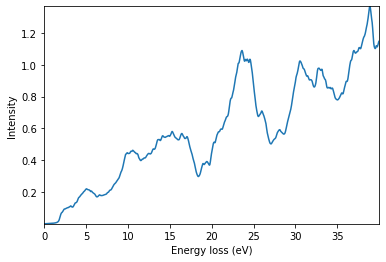

In [54]:
hys.plot.plot_spectra([spectrum])

In [ ]:
hys.plot.plot_spectra([spectrum[1]])

In [ ]:
hys.plot.plot_spectra([spectrum[5]])

In [ ]:
KK_res = spectrum[0].kramers_kronig_analysis(zlp=spectrum[1], n=1.65, iterations=1000, full_output=True)
print(KK_res)

In [75]:
KK_res = spectrum.kramers_kronig_analysis(zlp=10000, n=1.1, iterations=1, full_output=True)
print(KK_res)

(<DielectricFunction, title: test_simulateddielectric function (from Kramers-Kronig analysis), dimensions: (|1469)>, {'thickness': <BaseSignal, title: test_simulated thickness (calculated using Kramers-Kronig analysis), dimensions: (|1)>})


In [76]:
kk_size = KK_res[0].axes_manager[0].size
kk_step = KK_res[0].axes_manager[0].scale
kk_offs = KK_res[0].axes_manager[0].offset
kk_erange = np.arange(kk_offs, kk_size*kk_step+kk_offs, kk_step)
print(kk_erange.shape)
print("thickness = %f nm"%KK_res[1]["thickness"].data)

(1469,)
thickness = 65.912748 nm


In [77]:
%matplotlib qt
plt.figure(figsize=(10,10))
plt.plot(kk_erange, np.real(KK_res[0].data), label="e1")
plt.plot(kk_erange, np.imag(KK_res[0].data), label="e2")
plt.grid()
plt.legend(fontsize="xx-large")
plt.show()

In [ ]:
%matplotlib qt
plt.figure(figsize=(10,10))
plt.plot(kk_erange, KK_res[1]['surface plasmon estimation'], label="surface plasmon estimation")
plt.grid()
plt.legend(fontsize="xx-large")
plt.show()

In [ ]:
np.savetxt(tkf.asksaveasfilename(), kk_erange)
np.savetxt(tkf.asksaveasfilename(), np.real(KK_res[0].data))
np.savetxt(tkf.asksaveasfilename(), np.imag(KK_res[0].data))